In [1]:
import pandas as pd

In [2]:
dfs = pd.read_excel("Input/raw.xls", sheet_name=[0, 1])
ancestors = dfs[0]
productivity = dfs[1]

In [3]:
ancestors.head()

,Ферма,Кличка,Номер коровы,Порода,Линия,Семейство,Дата рождения,Место рождения,Коэффициент инбридинга,Дата выбытия,...,3 лактация: Ширина груди,3 лактация: Ширина в маклоках,3 лактация: Косая длина туловища,3 лактация: Обхват груди за лопатками,3 лактация: Обхват пясти,3 лактация: Оценка типа,3 лактация:Общий вид и развитие,3 лактация:вымя,3 лактация:ноги передние и задние,3 лактация:сумма баллов
0,11.0,Комедия,864,30.0,6.0,NaN,2003-09-01,1884200.0,"1,46",2006-11-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,Рика,446,30.0,1.0,NaN,2007-06-28,1884200.0,"0,88",2014-04-01,...,NaN,NaN,NaN,207.0,NaN,NaN,"2,5","4,5","2,0","9,0"
2,11.0,Накладка,467,30.0,6.0,NaN,2007-06-28,1884200.0,"0,20",2009-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,Ласточка,535,30.0,1.0,NaN,2003-06-11,1884200.0,"0,78",2005-11-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,Куница,619,30.0,5.0,NaN,2003-07-04,1884200.0,"0,98",2007-10-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
productivity.head()

,Статус,Ферма,Кличка,Номер коровы,Порода,Линия,Семейство,Дата рождения,Место рождения,Возраст 1-го отела,...,Осеменение по счету.10,Дата плодотворной случки.10,Номер быка.10,Дата запуска.9,Дата 11 отела,Сухостойный период.9,Сервис-период.10,Пол теленка.10,Номер теленка.9,Легкость отела.10
0,А,11.0,Комедия,864,30.0,6.0,NaN,2003-09-01,1884200.0,34.0,...,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,А,11.0,Рика,446,30.0,1.0,NaN,2007-06-28,1884200.0,23.0,...,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,А,11.0,Накладка,467,30.0,6.0,NaN,2007-06-28,1884200.0,23.0,...,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,А,11.0,Ласточка,535,30.0,1.0,NaN,2003-06-11,1884200.0,28.0,...,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,А,11.0,Куница,619,30.0,5.0,NaN,2003-07-04,1884200.0,26.0,...,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [5]:
ancestors.shape

(15651, 149)

In [6]:
productivity.shape

(15651, 256)

In [7]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(ancestors.columns)]

In [8]:
col_mapping

['0:Ферма',
 '1:Кличка',
 '2:Номер коровы',
 '3:Порода',
 '4:Линия',
 '5:Семейство',
 '6:Дата рождения',
 '7:Место рождения',
 '8:Коэффициент инбридинга',
 '9:Дата выбытия',
 '10:Причины выбытия',
 '11:Возраст 1-го отела',
 '12:Кровность по 1 улучшающей',
 '13:Проверка на РИД',
 '14:Мать коровы:кличка',
 '15:Инд.номер матери',
 '16:Порода матери',
 '17:Линия.1',
 '18:Семейство.1',
 '19:Живая масса',
 '20:Возраст(лакт)',
 '21:Дата,причина выбытия',
 '22:Мать:1 лактация,дойные дни',
 '23:Удой за 305 дн. ',
 '24:Молочный жир,%',
 '25:Молочный жир,кг',
 '26:Белок, %',
 '27:Мать:2 лактация,кол-во дойных дней',
 '28:Мать:удой за 305 дней 2 лактации',
 '29:Мать:2 лактация, содержание жира,%',
 '30:Мать:2 лактация,выход молочного жира,кг',
 '31:Мать:2 лактация,белок,%',
 '32:Мать:3 лактация,кол-во дойных дней',
 '33:Мать:удой за 305 дней 3 лактации',
 '34:Мать:3 лактация, содержание жира,%',
 '35:Мать:3 лактация,выход молочного жира,кг',
 '36:Мать:3 лактация,белок,%',
 '37:Мать:максимальная ла

In [9]:
ancestors_new = ancestors.iloc [:, [3,8,16,23,46,51,52,59,60,68,69,75,82,88,107,112]]

In [10]:
ancestors_new.head() 
ancestors_new.shape

(15651, 16)

In [11]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(productivity.columns)]

In [12]:
col_mapping

['0:Статус',
 '1:Ферма',
 '2:Кличка',
 '3:Номер коровы',
 '4:Порода',
 '5:Линия',
 '6:Семейство',
 '7:Дата рождения',
 '8:Место рождения',
 '9:Возраст 1-го отела',
 '10:Кровность по 1 улучшающей',
 '11:Проверка на РИД',
 '12:Средняя продукт. за ряд лактаций:удой',
 '13:Средняя продукт. за ряд лактаций:жир.кг',
 '14:Средняя продукт. за ряд лактаций:жир.%',
 '15:Средняя продукт. за ряд лактаций:белок,%',
 '16:Максимальная лактация по счету',
 '17:Максимальная лактация:удой',
 '18:Максимальная лактация:жир.кг',
 '19:Максимальная лактация:жир.%',
 '20:Максимальная лактация:белок,%',
 '21:Пожизненная продуктивность,удой',
 '22:Пожизненная продуктивность,жир,кг',
 '23:Пожизненная продуктивность,жир,%',
 '24:Пожизненная продуктивность,белок,%',
 '25:Номер посл. зак. лакт.',
 '26:Дойных дней в ПЗЛ',
 '27:ПЗЛ: удой 305 кг',
 '28:ПЗЛ: жир 305 кг',
 '29:ПЗЛ: жир 305 %',
 '30:ПЗЛ: белок 305 кг',
 '31:ПЗЛ: белок 305 %',
 '32:ПЗЛ: живая масса',
 '33:ПЗЛ: дата отела',
 '34:ПЗЛ: сервис-период',
 '35:Г

In [13]:
productivity_new = productivity.iloc [:, [9,12]]

In [14]:
productivity_new.head()

,Возраст 1-го отела,Средняя продукт. за ряд лактаций:удой
0,34.0,NaN
1,23.0,"7289,0"
2,23.0,NaN
3,28.0,NaN
4,26.0,"8972,0"


In [39]:
def null_pct(df: pd.DataFrame, name: str):
    null_pct_df = pd.DataFrame(df.isnull().sum() / len(ancestors_new))
    null_pct_df.to_excel(name+"_missing.xlsx")
    return null_pct_df

ancestors_new_missing = null_pct(ancestors_new, "ancestors_new")
ancestors_new_missing

,0
Порода,0.000703
Коэффициент инбридинга,0.496773
Порода матери,0.104274
Удой за 305 дн.,0.296083
ММ :удой за максимальную,0.259281
ОМ:порода,0.193342
ОМ:категория,0.237493
ОММ:порода,0.278321
ОММ:категория,0.295892
ООМ:порода,0.213660


In [83]:
ancestors_new[ancestors_new["Порода"].isnull()]

,Порода,Коэффициент инбридинга,Порода матери,Удой за 305 дн.,ММ :удой за максимальную,ОМ:порода,ОМ:категория,ОММ:порода,ОММ:категория,ООМ:порода,ООМ:категория,Отец:категория,МО:удой за среднюю лактацию,ОО:категория,Живая масса при рождении,Живая масса при 1 осеменении
5282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
ancestors_new

,Порода,Коэффициент инбридинга,Порода матери,Удой за 305 дн.,ММ :удой за максимальную,ОМ:порода,ОМ:категория,ОММ:порода,ОММ:категория,ООМ:порода,ООМ:категория,Отец:категория,МО:удой за среднюю лактацию,ОО:категория,Живая масса при рождении,Живая масса при 1 осеменении
0,30.0,"1,46",30.0,"7046,0","7591,0",32.0,30.0,30.0,33.0,32.0,NaN,99.0,NaN,10.0,28.0,451.0
1,30.0,"0,88",30.0,"9433,0","8661,0",32.0,3.0,30.0,99.0,32.0,NaN,20.0,NaN,NaN,36.0,400.0
2,30.0,"0,20",30.0,"7072,0","8364,0",32.0,99.0,32.0,20.0,32.0,NaN,99.0,"11500,0",NaN,30.0,416.0
3,30.0,"0,78",30.0,"8493,0","8804,0",30.0,99.0,32.0,10.0,30.0,2.0,20.0,"11106,0",NaN,34.0,393.0
4,30.0,"0,98",30.0,"6666,0",NaN,32.0,99.0,32.0,10.0,32.0,NaN,22.0,NaN,NaN,33.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,32.0,"0,40",32.0,NaN,NaN,32.0,20.0,32.0,10.0,32.0,20.0,NaN,"9537,0",NaN,NaN,NaN
15647,32.0,NaN,32.0,NaN,"10726,0",32.0,77.0,32.0,77.0,32.0,NaN,20.0,"13743,0",20.0,NaN,NaN
15648,32.0,"0,10",32.0,NaN,"8917,0",32.0,NaN,32.0,11.0,32.0,99.0,NaN,"8680,0",NaN,NaN,NaN
15649,32.0,"1,04",32.0,NaN,"11160,0",32.0,NaN,32.0,99.0,32.0,99.0,23.0,"13272,0",NaN,NaN,NaN


In [78]:
from collections import Counter

Counter(ancestors_new["Порода"]

Counter({30.0: 12126,
         32.0: 3483,
         35.0: 10,
         31.0: 15,
         1.0: 3,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         45.0: 3,
         nan: 1})

In [61]:
pd.to_numeric(ancestors_new.iloc[:, 1].str.replace(",", ".")).mean()
pd.to_numeric(ancestors_new.iloc[:, 1].str.replace(",", ".")).median()

cool_series = pd.to_numeric(ancestors_new.iloc[:, 1].str.replace(",", "."))
# cool_series.hist()

0.5

In [65]:
cool_series.fillna(cool_series.median()).isnull().sum()

0

In [60]:
cool_series.min()

0.05

In [27]:
def null_pct(df: pd.DataFrame, name: str):
    null_pct_df = pd.DataFrame(df.isnull().sum(axis = 1) / len(ancestors_new.columns))
    null_pct_df.to_excel(name+"_missing.xlsx")
    return null_pct_df

ancestors_new_missing_cols = null_pct(ancestors_new, "ancestors_new")
ancestors_new_missing_cols

,0
0,0.1250
1,0.1875
2,0.1250
3,0.0625
4,0.2500
...,...
15646,0.3750
15647,0.3125
15648,0.3750
15649,0.3125


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

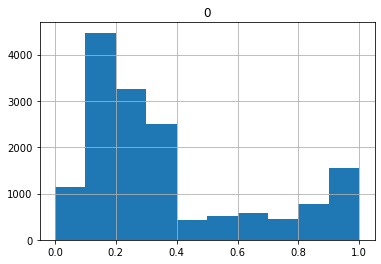

In [31]:
ancestors_new_missing.sort_values(0).hist()

In [17]:
def null_pct(df: pd.DataFrame, name: str):
    null_pct_df = pd.DataFrame(df.isnull().sum() / len(productivity_new))
    null_pct_df.to_excel(name+"_missing.xlsx")
    return null_pct_df

productivity_new_missing = null_pct(productivity_new, "productivity_new")
productivity_new_missing

,0
Возраст 1-го отела,0.630247
Средняя продукт. за ряд лактаций:удой,0.494026


In [18]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable


In [19]:
# saves pandas dataframe to excel file, setting column width for index to the max length of the index
def save_with_wrap(df: pd.DataFrame, excel_name: str):
    # find the max length of the index
    idx_max = max([len(str(s)) for s in df.index.values] + [len(str(df.index.name))])
    # create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter(excel_name, engine='xlsxwriter')
    # Convert the dataframe to an XlsxWriter Excel object.
    df.to_excel(writer, sheet_name='Sheet1')
    worksheet = writer.sheets['Sheet1']
    # set the column width to the max length of the index plus 2
    worksheet.set_column(0, 0, idx_max + 2)
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

save_with_wrap(ancestors_missing, "ancestors_missing.xlsx")
save_with_wrap(productivity_missing, "productivity_missing.xlsx")

NameError: name 'ancestors_missing' is not defined